**Operations Research in Action &#x25aa; Fall 2024**

# Project 1 &ndash; Modeling &ndash; Part 2

## Regression model building and analysis 

* Let's start by loading the [olsrr](https://olsrr.rsquaredacademy.com/) library (which we will use shortly) and setting the display width to 100: 

In [1]:
library(olsrr)
options(width=100)


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers




* Next, let's read in the CSV file that we created in Part 1 and preview the first few rows: 

In [2]:
# Solution
all_df <- read.csv('all.csv')

head(all_df)

,Year,Month,BeerConsumption,AvgBeerPrice,AvgRakiPrice,AvgCannedSoftDrinkPrice,AvgCannedBeerPrice,AvgDraftBeerPrice,Czechoslovakia,Germany,UnitedKingdom,UnitedStates,France,Others,RamadanDays,TouristBeerConsumption
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1987,January,13621800,1338.425,9715.74,2208.12,2671.750,971.5740,290,28056,11380,25060,9246,35135,0,27226.00
2,1987,February,14346944,1314.442,9460.31,2150.07,2866.475,946.0312,253,29715,20630,21648,11941,38488,0,30473.28
3,1987,March,14912839,1267.543,9122.77,2073.36,2764.199,912.2769,478,67370,30506,30386,15810,53071,0,52677.45
4,1987,April,16129850,1241.472,8935.13,2030.71,2707.345,893.5132,1025,271147,70016,43137,94247,141639,2,168507.66
5,1987,May,12140503,1183.481,8517.76,1935.85,2580.882,851.7761,2776,405921,165298,69696,155816,225780,28,274701.48
6,1987,June,29759419,1184.666,8526.29,2034.68,2583.465,852.6288,8785,381631,232010,109948,121463,308797,0,307600.00


### Model 1

* Let's start by fitting a linear regression model that includes all the variables we discussed above.

* Recall that we can explicitly set the order of a categorical variable ("factor" in R parlance) with the `factor()` function in R.

In [3]:
# Solution
all_df$Month <- factor(
    all_df$Month, 
    levels = c('January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December')
) 

fit <- lm(
    BeerConsumption
    ~
    AvgBeerPrice
    + AvgRakiPrice
    + AvgCannedSoftDrinkPrice
    + AvgCannedBeerPrice
    + AvgDraftBeerPrice
    + TouristBeerConsumption
    + RamadanDays
    + Year
    + Month,
    data = all_df 
)

summary(fit)


Call:
lm(formula = BeerConsumption ~ AvgBeerPrice + AvgRakiPrice + 
    AvgCannedSoftDrinkPrice + AvgCannedBeerPrice + AvgDraftBeerPrice + 
    TouristBeerConsumption + RamadanDays + Year + Month, data = all_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-6441051 -1814349  -342782  2104359  6623692 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -6.457e+09  9.950e+08  -6.490 1.45e-08 ***
AvgBeerPrice            -2.457e+04  8.028e+03  -3.061 0.003227 ** 
AvgRakiPrice             1.263e+02  5.304e+02   0.238 0.812504    
AvgCannedSoftDrinkPrice  1.622e+03  4.474e+03   0.362 0.718224    
AvgCannedBeerPrice      -1.535e+03  4.528e+03  -0.339 0.735767    
AvgDraftBeerPrice        1.263e+04  1.004e+04   1.258 0.212896    
TouristBeerConsumption   2.205e+01  6.198e+00   3.558 0.000709 ***
RamadanDays             -3.188e+05  7.827e+04  -4.073 0.000130 ***
Year                     3.264e+06  4.998e+05   6.531 1.23e-08 **

### Best subsets regression

- We see that some of the predictors in Model 1 are not statistically significant.

- Recall that removing or adding a predictor to a linear regression model will affect the statistical significance of the other predictors.

- How do we know which predictors to keep?

- __Best subsets regression__ chooses predictors by comparing _all possible subsets of predictors_ according to some metric.

- There are a number of metrics that could be used to compare the fit of different regression models.

- We will use __Akaike's information criterion (AIC)__, which is popular among practicing statisticians.

- Lower values of AIC $\leftrightarrow$ model is more preferred.

- We can perform best subsets regression using `ols_step_best_subset()` from the olsrr package, like this:

In [4]:
# Solution
ols_step_best_subset(fit, metric='aic')

                                                              Best Subsets Regression                                                              
---------------------------------------------------------------------------------------------------------------------------------------------------
Model Index    Predictors
---------------------------------------------------------------------------------------------------------------------------------------------------
     1         TouristBeerConsumption                                                                                                               
     2         Year Month                                                                                                                           
     3         TouristBeerConsumption Year Month                                                                                                    
     4         AvgBeerPrice TouristBeerConsumption Year Month                      

* According to the AIC, which model gives us the best fit?

_Write your notes here. Double-click to edit._

_Solution._ Model 6 has the lowest AIC.

### Model 2

* Let's fit the best model according to AIC:


In [5]:
# Solution
best_fit <- lm(
    BeerConsumption
    ~
    AvgBeerPrice
    + AvgDraftBeerPrice
    + TouristBeerConsumption
    + RamadanDays
    + Year
    + Month,
    data = all_df 
)

summary(best_fit)


Call:
lm(formula = BeerConsumption ~ AvgBeerPrice + AvgDraftBeerPrice + 
    TouristBeerConsumption + RamadanDays + Year + Month, data = all_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-6592476 -1859240  -216914  2166354  6604799 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -6.658e+09  5.490e+08 -12.128  < 2e-16 ***
AvgBeerPrice           -2.690e+04  6.306e+03  -4.265 6.42e-05 ***
AvgDraftBeerPrice       1.343e+04  8.741e+03   1.537 0.129107    
TouristBeerConsumption  2.307e+01  4.845e+00   4.762 1.07e-05 ***
RamadanDays            -3.167e+05  7.489e+04  -4.228 7.30e-05 ***
Year                    3.366e+06  2.753e+05  12.228  < 2e-16 ***
MonthFebruary          -1.798e+05  1.740e+06  -0.103 0.918000    
MonthMarch              4.994e+06  1.890e+06   2.643 0.010235 *  
MonthApril              1.770e+06  2.294e+06   0.772 0.443013    
MonthMay                6.491e+06  2.813e+06   2.308 0.024113 *  
MonthJune

* Let's check the diagnostic plots:

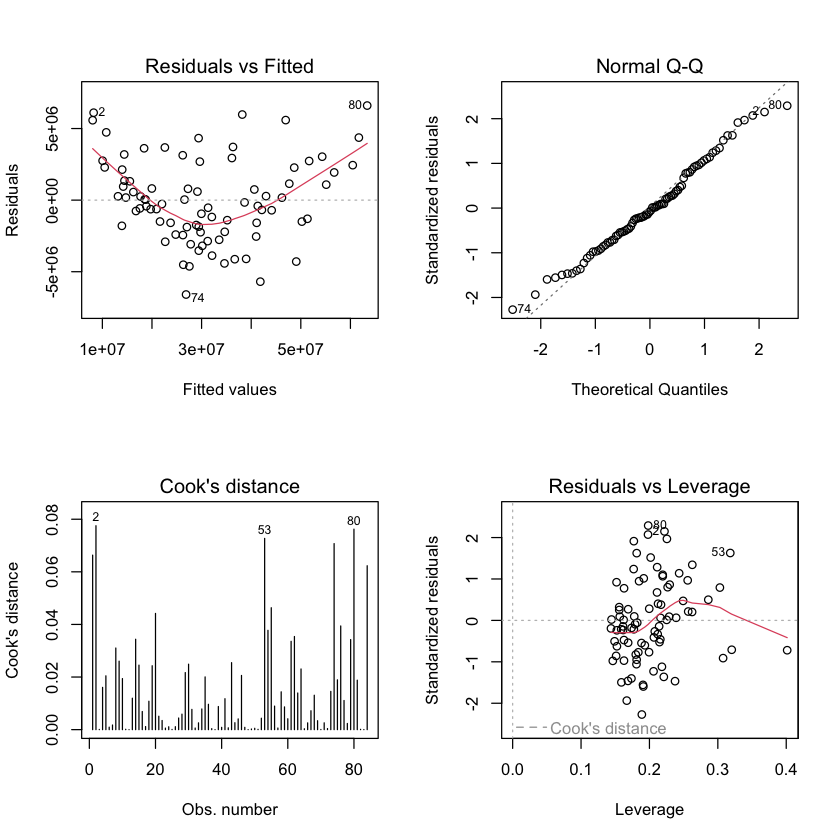

In [6]:
# Solution
par(mfrow=c(2, 2))
plot(best_fit, which=1)
plot(best_fit, which=2)
plot(best_fit, which=4)
plot(best_fit, which=5)

* Let's also compute the __variance inflation factors (VIFs)__ to detect multicollinearity.

* We can do this using the `ols_vif_tol()` function from the olsrr package, like this:

In [7]:
# Solution
ols_vif_tol(best_fit)

Variables,Tolerance,VIF
<chr>,<dbl>,<dbl>
AvgBeerPrice,0.4030035,2.481368
AvgDraftBeerPrice,0.3591388,2.784438
TouristBeerConsumption,0.1060114,9.432952
RamadanDays,0.5062031,1.975492
Year,0.4075691,2.453572
MonthFebruary,0.5341097,1.872275
MonthMarch,0.4527232,2.208855
MonthApril,0.3072742,3.254423
MonthMay,0.2043861,4.892700


* Assess this model using the the diagnostic plots and VIFs. If there are any issues, suggest a remedy.

_Write your notes here. Double-click to edit._

_Solution._

- Residuals vs. fitted plot indicates that linearity appears to be violated.

- We also have multicollinearity issues: the VIF of WeightedTouristBeerConsumption is greater than 5.

- Let's try using log(BeerConsumption) as the response variable instead.

### Model 3

- Let's start again with all the possible explanatory variables, but this time, with the transformed response variable.

In [8]:
# Solution
all_df$logBeerConsumption <- log(all_df$BeerConsumption)

logfit <- lm(
    logBeerConsumption
    ~
    AvgBeerPrice
    + AvgRakiPrice
    + AvgCannedSoftDrinkPrice
    + AvgCannedBeerPrice
    + AvgDraftBeerPrice
    + TouristBeerConsumption
    + RamadanDays
    + Year
    + Month,
    data = all_df 
)

summary(logfit)


Call:
lm(formula = logBeerConsumption ~ AvgBeerPrice + AvgRakiPrice + 
    AvgCannedSoftDrinkPrice + AvgCannedBeerPrice + AvgDraftBeerPrice + 
    TouristBeerConsumption + RamadanDays + Year + Month, data = all_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21483 -0.03829  0.00152  0.03871  0.15605 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.425e+02  2.421e+01 -10.015 9.94e-15 ***
AvgBeerPrice            -6.152e-04  1.954e-04  -3.149  0.00249 ** 
AvgRakiPrice            -8.309e-06  1.291e-05  -0.644  0.52198    
AvgCannedSoftDrinkPrice  1.833e-04  1.089e-04   1.683  0.09716 .  
AvgCannedBeerPrice      -5.388e-05  1.102e-04  -0.489  0.62655    
AvgDraftBeerPrice        3.980e-04  2.443e-04   1.629  0.10829    
TouristBeerConsumption   1.254e-07  1.508e-07   0.831  0.40882    
RamadanDays             -1.420e-02  1.905e-03  -7.455 2.94e-10 ***
Year                     1.304e-01  1.216e-02  10.721 6.32e-16

### Best subsets regression, again

- Next, let's perform best subsets regression to identify the best collection of predictors, based on AIC.

In [9]:
# Solution
ols_step_best_subset(logfit, metric='aic')

                                                              Best Subsets Regression                                                              
---------------------------------------------------------------------------------------------------------------------------------------------------
Model Index    Predictors
---------------------------------------------------------------------------------------------------------------------------------------------------
     1         TouristBeerConsumption                                                                                                               
     2         Year Month                                                                                                                           
     3         RamadanDays Year Month                                                                                                               
     4         AvgBeerPrice RamadanDays Year Month                                 

### Model 4

- Let's examine the best subsets regression by AIC.

In [10]:
# Solution
best_logfit <- lm(
    logBeerConsumption
    ~
    AvgBeerPrice
    + AvgCannedSoftDrinkPrice
    + AvgDraftBeerPrice
    + TouristBeerConsumption
    + RamadanDays
    + Year
    + Month,
    data = all_df 
)

summary(best_logfit)


Call:
lm(formula = logBeerConsumption ~ AvgBeerPrice + AvgCannedSoftDrinkPrice + 
    AvgDraftBeerPrice + TouristBeerConsumption + RamadanDays + 
    Year + Month, data = all_df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.225199 -0.041333 -0.003322  0.041210  0.160711 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.502e+02  1.589e+01 -15.750  < 2e-16 ***
AvgBeerPrice            -6.380e-04  1.594e-04  -4.002 0.000161 ***
AvgCannedSoftDrinkPrice  1.354e-04  6.695e-05   2.023 0.047165 *  
AvgDraftBeerPrice        3.219e-04  2.183e-04   1.474 0.145133    
TouristBeerConsumption   1.815e-07  1.213e-07   1.497 0.139236    
RamadanDays             -1.391e-02  1.843e-03  -7.550 1.69e-10 ***
Year                     1.343e-01  7.935e-03  16.919  < 2e-16 ***
MonthFebruary            4.220e-02  4.286e-02   0.985 0.328432    
MonthMarch               3.359e-01  4.717e-02   7.122 9.83e-10 ***
MonthApril           

* Are you satisfied with this model? Why or why not?

_Write your notes here. Double-click to edit._

*Solution.*

- Looking at Model 4, we see that AvgDraftBeerPrice and TouristBeerConsumption are not statistically significant.

- Let's take them out. Note that this gives us the best regression with 5 predictors (see best subsets table above).

### Model 5

- Let's examine the best subsets regression by AIC with 5 predictors.

In [11]:
# Solution
best5_logfit <- lm(
    logBeerConsumption
    ~
    AvgBeerPrice
    + AvgCannedSoftDrinkPrice
    + RamadanDays
    + Year
    + Month,
    data = all_df 
)

summary(best5_logfit)


Call:
lm(formula = logBeerConsumption ~ AvgBeerPrice + AvgCannedSoftDrinkPrice + 
    RamadanDays + Year + Month, data = all_df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.212113 -0.052371 -0.001813  0.053253  0.156207 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.567e+02  1.200e+01 -21.386  < 2e-16 ***
AvgBeerPrice            -4.977e-04  1.196e-04  -4.162 9.08e-05 ***
AvgCannedSoftDrinkPrice  1.747e-04  6.572e-05   2.658  0.00979 ** 
RamadanDays             -1.446e-02  1.808e-03  -7.997 2.22e-11 ***
Year                     1.375e-01  5.971e-03  23.030  < 2e-16 ***
MonthFebruary            4.102e-02  4.367e-02   0.939  0.35082    
MonthMarch               3.540e-01  4.684e-02   7.557 1.39e-10 ***
MonthApril               2.796e-01  4.861e-02   5.751 2.30e-07 ***
MonthMay                 5.993e-01  4.540e-02  13.200  < 2e-16 ***
MonthJune                7.858e-01  4.427e-02  17.749  < 2e-16 ***
Mont

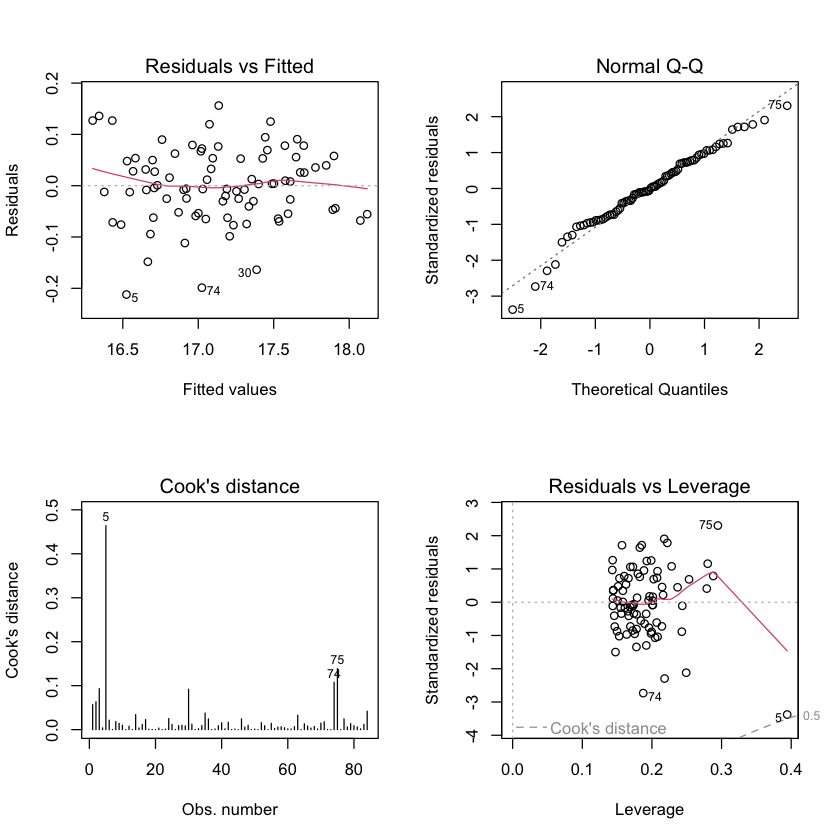

In [12]:
# Solution
par(mfrow=c(2, 2))
plot(best5_logfit, which=1)
plot(best5_logfit, which=2)
plot(best5_logfit, which=4)
plot(best5_logfit, which=5)

In [13]:
# Solution
ols_vif_tol(best5_logfit)

Variables,Tolerance,VIF
<chr>,<dbl>,<dbl>
AvgBeerPrice,0.7035491,1.421365
AvgCannedSoftDrinkPrice,0.4621086,2.163994
RamadanDays,0.5450715,1.834622
Year,0.5438136,1.838866
MonthFebruary,0.5323949,1.878305
MonthMarch,0.4627657,2.160921
MonthApril,0.4297176,2.327110
MonthMay,0.4924821,2.030531
MonthJune,0.5180137,1.930451


* Assess this model using the the diagnostic plots and VIFs. If there are any issues, suggest a remedy.

_Write your notes here. Double-click to edit._

_Solution._

- Residuals vs. fitted plot indicates that linearity and equal variance are reasonably satisfied.

- Normal QQ plot indicates that the residuals are approximately normally distributed.

- Multicollinearity does not appear to be an issue, since the VIFs are all below 5.